# **Project : Heart Disease Prediction Using Classification Algorithms**



# 1. Data Preparation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,  VotingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv('/content/heart (1).csv')

In [3]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Data Wrangling

In [4]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [7]:
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [34]:
from google.colab import files
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from sklearn.preprocessing import StandardScaler

# target column hata do
df = df.drop('HeartDisease', axis=1)

# Standard Scaler apply karo
scaler = StandardScaler()
norm_df = scaler.fit_transform(df)

In [9]:
scaled_df = pd.DataFrame(norm_df,columns=df.columns)

In [30]:
# Save the scaler as a .pkl file
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [33]:
# Download the file in Colab
from google.colab import files
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visulization

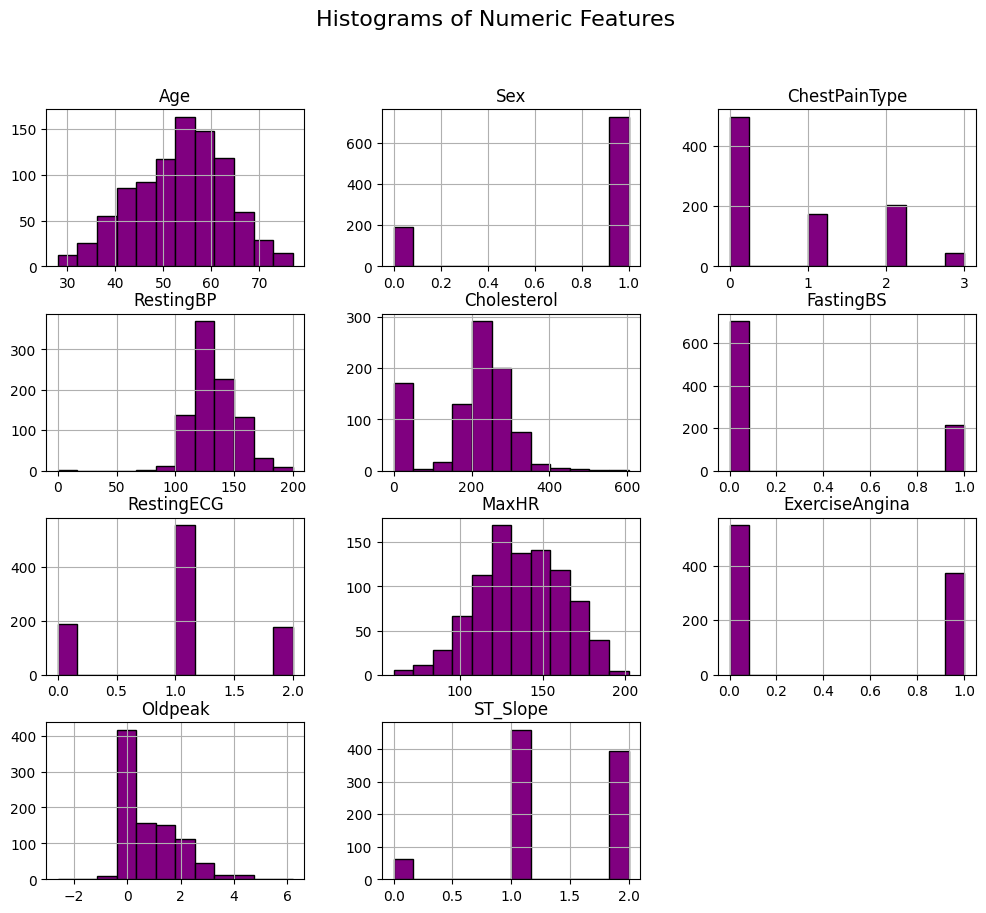

In [11]:
df.hist(figsize=(12, 10), bins=12, color='purple', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

In [12]:
print(y.value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


# Synthesized Data

In [13]:
scaled_df['HeartDisease'] = y
X = scaled_df.drop(['HeartDisease'],axis=1)

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled,y_resempled = smote.fit_resample(X,y)

In [15]:
df_resampled = pd.concat([X_resampled,y_resempled],axis =1)

In [16]:
print(df_resampled['HeartDisease'].value_counts())

HeartDisease
0    508
1    508
Name: count, dtype: int64


# Model Training

In [17]:
# Split the data into 80% training and 20% testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resempled, test_size=0.2, random_state=42)

In [18]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
332,-1.645286,0.515952,1.275059,-1.750778,-1.818435,-0.551341,0.017255,1.658016,-0.823556,-1.864338,1.052114
708,0.051881,0.515952,-0.816995,-1.210356,0.065863,-0.551341,-1.566710,-1.132156,1.214246,-0.832432,-0.596078
218,0.157954,0.515952,0.229032,0.410909,-0.025608,-0.551341,0.017255,0.518368,-0.823556,-0.832432,1.052114
425,0.688318,0.515952,0.229032,1.491752,0.623835,1.813758,1.601219,0.793455,-0.823556,-0.363384,-0.596078
448,1.006537,0.515952,-0.816995,1.491752,0.285393,1.813758,0.017255,-1.250051,1.214246,0.105664,-0.596078
...,...,...,...,...,...,...,...,...,...,...,...
106,-0.584556,-1.938163,-0.816995,-0.669935,0.504923,-0.551341,1.601219,-1.053560,-0.823556,-0.832432,1.052114
270,-0.902775,0.515952,-0.816995,-0.669935,0.239657,-0.551341,0.017255,0.125386,-0.823556,-0.832432,1.052114
860,0.688318,0.515952,-0.816995,-0.129513,0.495776,-0.551341,0.017255,0.282579,1.214246,0.480902,1.052114
435,0.688318,0.515952,-0.816995,1.059415,-1.818435,-0.551341,1.601219,-0.739174,1.214246,-0.832432,1.052114


In [19]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = model_rf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay,classification_report

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88
Precision: 0.89
Recall: 0.90
F1 Score: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        88
           1       0.89      0.90      0.89       116

    accuracy                           0.88       204
   macro avg       0.88      0.87      0.87       204
weighted avg       0.88      0.88      0.88       204



In [23]:
joblib.dump(model_rf, 'model_rf.pkl')
print("Model saved are successfully as 'model_rf.pkl'")

Model saved are successfully as 'model_rf.pkl'


In [35]:
from google.colab import files
files.download("model_rf.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

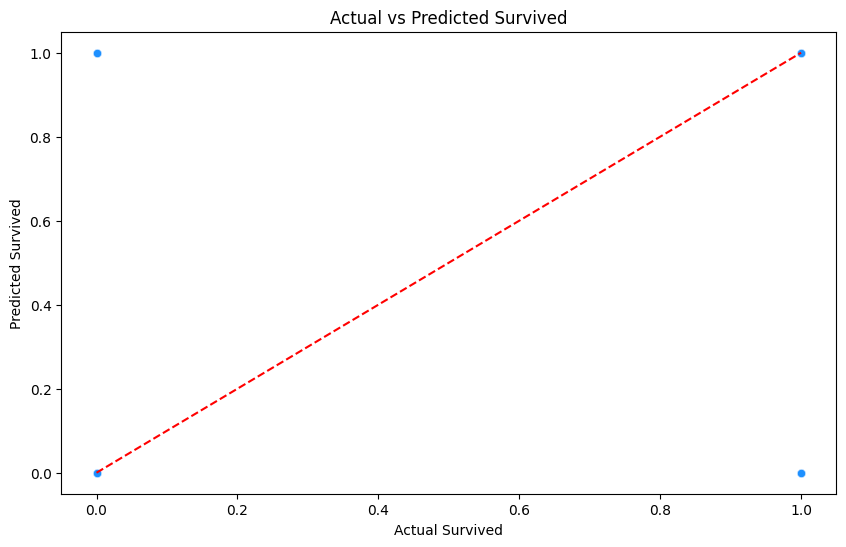

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolors='w',linewidths=0.5)
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Actual vs Predicted Survived')
plt.plot([0,1],[0,1], 'r--')
plt.show()

# Web Intigration

In [26]:
!pip install Flask flask-ngrok pyngrok
import os

# Create templates folder if not exists
if not os.path.exists('templates'):
    os.makedirs('templates')

In [27]:
# Corrected HTML template for Heart Disease Prediction
html_template = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Heart Disease Prediction</title>
    <style>
        body {font-family: Arial, sans-serif; background-color: #104981; margin: 20px;}
        .container {max-width: 600px; margin: auto; padding: 20px; background-color: #1dace9; border-radius: 10px; box-shadow: 0 0 10px rgba(5, 33, 136, 0.1);}
        input, select, button {width: 100%; padding: 10px; margin: 10px 0; border-radius: 5px; border: 1px solid #ccc; box-sizing: border-box;}
        button {background-color: #007bff; color: white; border: none; cursor: pointer;}
        button:hover {background-color: #0056b3;}
        #result {margin-top: 20px;}
        button.print-btn {background-color: #28a745;}
        button.print-btn:hover {background-color: #218838;}
    </style>
</head>
<body>
    <div class="container">
        <h1>Heart Disease Prediction</h1>
        <form id="predictForm">
            <label>Age:</label>
            <input type="number" step="any" name="Age" required>

            <label>Sex:</label>
            <select name="Sex" required>
                <option value="male">Male</option>
                <option value="female">Female</option>
            </select>

            <label>Chest Pain Type:</label>
            <select name="ChestPainType" required>
                <option value="typical">Typical Angina</option>
                <option value="atypical">Atypical Angina</option>
                <option value="non-anginal">Non-anginal Pain</option>
                <option value="asymptomatic">Asymptomatic</option>
            </select>

            <label>Resting BP:</label>
            <input type="number" step="any" name="RestingBP" required>

            <label>Cholesterol:</label>
            <input type="number" step="any" name="Cholesterol" required>

            <label>Fasting Blood Sugar (0=No, 1=Yes):</label>
            <input type="number" min="0" max="1" name="FastingBS" required>

            <label>Resting ECG:</label>
            <select name="RestingECG" required>
                <option value="normal">Normal</option>
                <option value="ST-T wave abnormality">ST-T Wave Abnormality</option>
                <option value="left ventricular hypertrophy">Left Ventricular Hypertrophy</option>
            </select>

            <label>Max Heart Rate (MaxHR):</label>
            <input type="number" step="any" name="MaxHR" required>

            <label>Exercise Angina:</label>
            <select name="ExerciseAngina" required>
                <option value="no">No</option>
                <option value="yes">Yes</option>
            </select>

            <label>Oldpeak:</label>
            <input type="number" step="any" name="Oldpeak" required>

            <label>ST Slope:</label>
            <select name="ST_Slope" required>
                <option value="upsloping">Upsloping</option>
                <option value="flat">Flat</option>
                <option value="downsloping">Downsloping</option>
            </select>

            <button type="button" onclick="predict()">Predict</button>
        </form>

        <div id="result">
            <h2>Prediction Result:</h2>
            <p id="prediction"></p>
        </div>
        <button class="print-btn" onclick="window.print()">Print This Page</button>
    </div>

    <script>
    async function predict() {
        const form = document.getElementById('predictForm');
        const formData = new FormData(form);
        const response = await fetch('/predict', {method: 'POST', body: formData});
        const result = await response.json();
        let emoji = result.prediction === 'No Heart Disease' ? ' 😃' : ' ❤️';
        document.getElementById('prediction').innerText = 'Prediction: ' + (result.prediction || result.error) + emoji;
    }
    </script>
</body>
</html>
'''

# Save HTML to templates folder
import os
os.makedirs('templates', exist_ok=True)
with open('templates/index.html', 'w') as f:
    f.write(html_template)


In [28]:
# Corrected Flask backend for Heart Disease Prediction
import joblib
import pandas as pd
from flask import Flask, request, jsonify, render_template
from pyngrok import ngrok

# Load scaler & model
scaler = joblib.load('scaler.pkl')
model = joblib.load('model_rf.pkl')

# Flask app
app = Flask(__name__)

# NGROK setup
ngrok.set_auth_token("31jBaQk8dDJmRhJKpkSQTX4hPps_862xLFPTUZSebYiExYSTV")  # <-- Replace with your token
port = 5001
public_url = ngrok.connect(port)
print(f"Ngrok Tunnel URL: {public_url}")

# Categorical mappings (must match LabelEncoder used in training)
categorical_mapping = {
    'Sex': {'male': 1, 'female': 0},
    'ChestPainType': {'typical': 0, 'atypical': 1, 'non-anginal': 2, 'asymptomatic': 3},
    'RestingECG': {'normal': 0, 'ST-T wave abnormality': 1, 'left ventricular hypertrophy': 2},
    'ExerciseAngina': {'no': 0, 'yes': 1},
    'ST_Slope': {'upsloping': 0, 'flat': 1, 'downsloping': 2}
}

# Flask routes
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Collect form input
        input_data = {col: request.form[col] for col in ['Age','Sex','ChestPainType','RestingBP','Cholesterol',
                                                         'FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']}

        # Map categorical features
        for col in ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']:
            input_data[col] = categorical_mapping[col][input_data[col]]

        # Convert to DataFrame
        features_df = pd.DataFrame([input_data])

        # Scale data
        features_scaled = scaler.transform(features_df)

        # Predict
        prediction = model.predict(features_scaled)[0]
        result_label = 'No Heart Disease' if prediction == 0 else 'Heart Disease Risk'

        return jsonify({'prediction': result_label})

    except Exception as e:
        return jsonify({'error': str(e)})

# Run Flask app
if __name__ == '__main__':
    app.run(port=port)


Ngrok Tunnel URL: NgrokTunnel: "https://92b156c56b9b.ngrok-free.app" -> "http://localhost:5001"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Sep/2025 11:30:38] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Sep/2025 11:30:39] "GET /favicon.ico HTTP/1.1" 404 -
